# Ensemble Learning

## Initial Imports

In [69]:
import warnings
warnings.filterwarnings('ignore')

%config Completer.use_jedi = False

In [70]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [73]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import train_test_split

## Read the CSV and Perform Basic Data Cleaning

In [58]:
# Load the data
file_path = Path('Resources/LoanStats_2019Q1.csv')
df = pd.read_csv(file_path)

# Preview the data
non_numerical_columns = df.columns[df.dtypes !='float64']

idx_dummies = []
idx_remove = []

for idx in non_numerical_columns:
    unique_values = df[idx].unique()

    if len(unique_values) ==1:
        idx_remove.append(idx)
        print(f'\tWe will remove {idx} from feature vector')


    elif idx == 'loan_status':
        idx_remove.append(idx)
        print(f'\t We will remove {idx} from feature vector')
    
    else:
        
        print(idx, unique_values)
        idx_dummies.append(idx)


home_ownership ['RENT' 'MORTGAGE' 'OWN' 'ANY']
verification_status ['Source Verified' 'Verified' 'Not Verified']
issue_d ['Mar-2019' 'Feb-2019' 'Jan-2019']
	 We will remove loan_status from feature vector
	We will remove pymnt_plan from feature vector
initial_list_status ['w' 'f']
next_pymnt_d ['May-2019' 'Apr-2019']
application_type ['Individual' 'Joint App']
	We will remove hardship_flag from feature vector
	We will remove debt_settlement_flag from feature vector


## Split the Data into Training and Testing

In [66]:
# Create our features
# from sklearn.preprocessing import LabelEncoder

X = df.drop(columns=idx_remove)
X = pd.get_dummies(X, columns = idx_dummies)
# le = LabelEncoder()
# le.fit(X['home_ownership'])
# X['home_ownership'] = le.transform(X['home_ownership'])

# le.fit(X['verification_status'])
# X['verification_status'] = le.transform(X['verification_status'])



# Create our target
y = df['loan_status'].replace({'high_risk':1, 'low_risk':0})

In [65]:
X.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,issue_d_Feb-2019,issue_d_Jan-2019,issue_d_Mar-2019,initial_list_status_f,initial_list_status_w,next_pymnt_d_Apr-2019,next_pymnt_d_May-2019,application_type_Individual,application_type_Joint App
count,68817.000000,68817.000000,68817.000000,6.881700e+04,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,...,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000,68817.000000
mean,16677.594562,0.127718,480.652863,8.821371e+04,21.778153,0.217766,0.497697,12.587340,0.126030,17604.142828,...,0.148001,0.371696,0.451066,0.177238,0.123879,0.876121,0.383161,0.616839,0.860340,0.139660
std,10277.348590,0.048130,288.062432,1.155800e+05,20.199244,0.718367,0.758122,6.022869,0.336797,21835.880400,...,0.355104,0.483261,0.497603,0.381873,0.329446,0.329446,0.486161,0.486161,0.346637,0.346637
min,1000.000000,0.060000,30.890000,4.000000e+01,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9000.000000,0.088100,265.730000,5.000000e+04,13.890000,0.000000,0.000000,8.000000,0.000000,6293.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,15000.000000,0.118000,404.560000,7.300000e+04,19.760000,0.000000,0.000000,11.000000,0.000000,12068.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,24000.000000,0.155700,648.100000,1.040000e+05,26.660000,0.000000,1.000000,16.000000,0.000000,21735.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,40000.000000,0.308400,1676.230000,8.797500e+06,999.000000,18.000000,5.000000,72.000000,4.000000,587191.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
# Check the balance of our target values
Counter(y)

Counter({0: 68470, 1: 347})

In [74]:
# Split the X and y into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=42)

## Data Pre-Processing

Scale the training and testing data using the `StandardScaler` from `sklearn`. Remember that when scaling the data, you only scale the features data (`X_train` and `X_testing`).

In [75]:
# Create the StandardScaler instance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [77]:
# Fit the Standard Scaler with the training data
# When fitting scaling functions, only train on the training dataset
X_scaler = scaler.fit(X_train)

In [78]:
# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)X_train_scaled

## Ensemble Learners

In this section, you will compare two ensemble algorithms to determine which algorithm results in the best performance. You will train a Balanced Random Forest Classifier and an Easy Ensemble classifier . For each algorithm, be sure to complete the folliowing steps:

1. Train the model using the training data. 
2. Calculate the balanced accuracy score from sklearn.metrics.
3. Display the confusion matrix from sklearn.metrics.
4. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.
5. For the Balanced Random Forest Classifier only, print the feature importance sorted in descending order (most important feature to least important) along with the feature score

Note: Use a random state of 1 for each algorithm to ensure consistency between tests

### Balanced Random Forest Classifier

In [122]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
brf.fit(X_train_scaled, y_train)

BalancedRandomForestClassifier(random_state=1)

In [135]:
# Calculated the balanced accuracy score
y_pred_rf = brf.predict(X_test_scaled)
balanced_accuracy_score(y_test, y_pred_rf, adjusted=True).round(2)

0.55

In [124]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred_rf)

array([[15415,  1686],
       [   37,    67]])

In [125]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred_rf))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.90      0.64      0.95      0.76      0.60     17101
          1       0.04      0.64      0.90      0.07      0.76      0.57       104

avg / total       0.99      0.90      0.65      0.94      0.76      0.60     17205



            Feature  importance
16    total_rec_int    0.067924
20  last_pymnt_amnt    0.066701
13      total_pymnt    0.064992


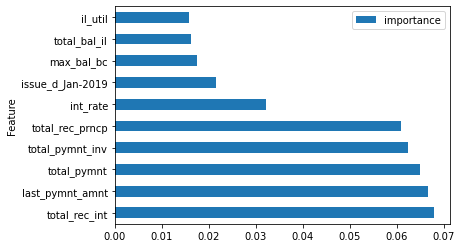

In [148]:
# List the features sorted in descending order by feature importance

brf_features = pd.DataFrame({'Feature':X.columns, 'importance': brf.feature_importances_})
brf_features = brf_features.sort_values(by='importance', ascending=False)
brf_features.iloc[:10,:].set_index('Feature').plot.barh()
print(brf_features.iloc[:3,:])

### Easy Ensemble Classifier

In [127]:
# Train the Classifier
from imblearn.ensemble import EasyEnsembleClassifier 
classifier = EasyEnsembleClassifier(n_estimators=100,random_state=42)

eec = classifier.fit(X_train_scaled, y_train)
y_pred_eec = eec.predict(X_test_scaled)

In [134]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test, y_pred_eec, adjusted=True).round(2)

0.86

In [129]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred_eec)

array([[16140,   961],
       [    9,    95]])

In [130]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred_eec))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.94      0.91      0.97      0.93      0.86     17101
          1       0.09      0.91      0.94      0.16      0.93      0.86       104

avg / total       0.99      0.94      0.91      0.97      0.93      0.86     17205



In [147]:
eec.verbose

# df_features = pd.DataFrame({'Feature':X.columns, 'importance': eec.feature_importances_})
# df_features = df_features.sort_values(by='importance', ascending=False)
# df_features.iloc[:10,:].set_index('Feature').plot.barh()

0

### Final Questions

1. Which model had the best balanced accuracy score?

    Easy Ensemble Classifier has adjusted balanced accuracy score 0.86 that is more than adjusted accuracy score of 0.55 for Balanced Random forest.

2. Which model had the best recall score?

    Easy Ensemble Classifier has recall score 0.91 that is more than recall of 0.64 for Balanced Random forest.

3. Which model had the best geometric mean score?

    0.93 > 0.76, better for EEC

4. What are the top three features?

     (total_rec_int, last_pymnt_amnt, total_pymnt)